In [3]:
import numpy as np
import numpy.matlib as mlib
import matplotlib.pyplot as plt
%matplotlib inline

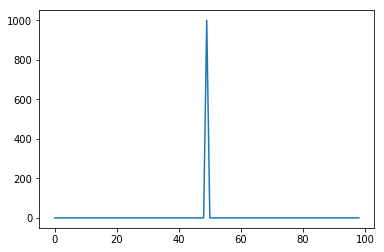

In [8]:
x = np.sort(np.random.rand(1,1000))
y = np.sort(np.random.rand(1,1000))
# neur1 =  mlib.repmat(x,len(y),1)
# neur2 = mlib.repmat(y,len(x),1)
# print(np.shape(x)[1])
# neur1.shape
# diff1 = neur1-mlib.repmat(np.transpose(y),1,len(x))

# neur1 =  mlib.repmat(x,len(y),1)
# neur2 = mlib.repmat(y,len(x),1)
# lenx = np.shape(x)[1]
# leny = np.shape(y)[1]
    
# diff1 = (neur1-mlib.repmat(np.transpose(y),1,len(x))).reshape(1,lenx*leny)
# diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
# tbin = np.linspace(-5,5,100)
# corr1, bedge = np.histogram(diff1,bins=tbin) 
# # 
# np.shape(corr1)
z = spikegram(x,y)
plt.plot(z)

In [12]:
def spikegram(x,y):
    
    neur1 =  mlib.repmat(x,len(y),1)
    neur2 = mlib.repmat(y,len(x),1)
    
    lenx = np.shape(x)[1]
    leny = np.shape(y)[1]
    
#     diff1 = (neur1-mlib.repmat(np.transpose(y),1,len(x))).reshape(1,lenx*leny)
#     diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
    
    diff1 = neur1-neur2[:,np.newaxis]
    diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
    
    tbin = np.linspace(-5,5,100) 
    corr1, bedge = np.histogram(diff1,tbin) 
    return corr1

   
    
#    if(a > b):
#       print str(a) + " is greater than " + str(b)
#    elif(b > a):
#       print str(b) + " is greater than " + str(a)

In [11]:
x[:,np.newaxis].shape
# y.shape

(1, 1, 1000)

In [14]:
a = [1,2]
a

[1, 2]

In [15]:
2*a

[1, 2, 1, 2]

In [17]:
2*a

[1, 2, 1, 2]

In [6]:
import numpy as np
from numba import jit
a = np.arange(1, 10 ** 7)
b = np.arange(-10 ** 7, -1)


@jit(nopython=True)
def sum_sequence(a, b):
    result = np.zeros_like(a)
    for i in range(len(a)):
        result[i] = a[i] - b[i]
    return result

In [8]:
import timeit
    
timeit.timeit('sum_sequence(a, b)', globals=globals(), number=1)

0.038495200000056684

In [4]:
10.0+9.99

19.990000000000002

In [3]:
1+9.99

10.99

In [5]:
a = {'a':2,'b':2}

In [10]:
len(a)

2

In [9]:
a

dict_keys(['a', 'b'])

In [2]:
list_of_lists = [ [1, 2, 3], [4, 5, 6], [7, 8, 9]]
for list in list_of_lists:
    for x in list:
        print(x)

1
2
3
4
5
6
7
8
9


In [4]:
for x in [1]:
    y = x+1
    print(y)

2


In [ ]:
import numpy as np
i=101
while prop < 99:
    a = str(i)
    b = np.zeros((len(a),1))
    c = np.diff(b)
    d = np.where()
    


In [1]:
str(100)

'100'

In [2]:
a = str(10000)

In [3]:
len(a)

5

In [7]:
a = np.arange(1,5)

In [10]:
# pr= 112
import numpy as np

k = np.where(a >5)

In [12]:
len(k)
k

(array([], dtype=int64),)

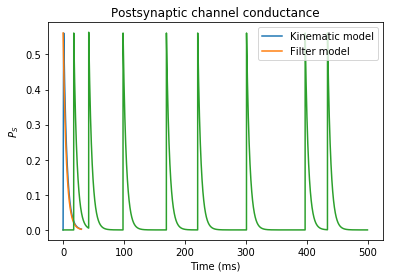

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#%% Modeling the postsynaptic conductance
# P_s is a numerical simulation of the kinematic model ofor a synapse
# P_s_e is an analytical approximation
dt  = 0.01 # [ms]
a_s = 0.93 # [ms]
b_s = 0.19 # [ms]

n_steps = 3000
P_s  = np.zeros(n_steps)
time = dt*np.arange(0,n_steps)
for t in range(1,n_steps):
    if t*dt > 1:
        a_s = 0
    
    dP_s = a_s*(1-P_s[t-1]) - b_s*P_s[t-1]
    P_s[t] = P_s[t-1] + dP_s*dt

P_max = np.max(P_s)

P_s_e = P_max*np.exp(-time*b_s)

plt.plot(time,P_s)
plt.plot(time,P_s_e)
plt.xlabel('Time (ms)')
plt.ylabel(r'$P_S$')
plt.title('Postsynaptic channel conductance')
plt.legend(['Kinematic model','Filter model'])
#%% Modeling arrival of multiple spikes
r  = 0.02 # Spikes per millisecond of presynaptic neuron
dt = 0.1  # simulation step [ms]
tau_s = 1/b_s

n_steps = 5000 # simulates 0.5 seconds
P_s  = np.zeros(n_steps)
time = dt*np.arange(0,n_steps)
for t in range(1,n_steps):
    if r*dt > np.random.rand():
        P_s[t] = P_s[t-1] + P_max*(1-P_s[t-1])
    else:
        P_s[t] = P_s[t-1] - (P_s[t-1]/tau_s)*dt

plt.plot(time,P_s)
    
#%% Modeling GABA_A and NMDA as a difference of two gaussian
